# Pytorch workflow

let's explore an example ptroch end-to-end workflow.

resources = https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

https://www.learnpytorch.io/01_pytorch_workflow/

ask questions = https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1]:
what_were_covering = {
    1: "data prep and load",
    2: "bulid and train model",
    3: "fitting the model to data (training)",
    4: "saving and loading the model",
    5: "putting it all together"
}

what_were_covering

{1: 'data prep and load',
 2: 'bulid and train model',
 3: 'fitting the model to data (training)',
 4: 'saving and loading the model',
 5: 'putting it all together'}

In [2]:
import torch
from torch import nn, optim  # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.4.1+cu124'

# 1. Data prep and loading

Dat acan be almost anything.. in ML
- Excel spreasheets
- images of any kind
- Videos (yt has a lot of data)
- Audio like songs or podcasts
- DNA
- Text

Machine learning is a game of 2 parts :
1. get data into numerical representation
2. Build a model to learn patterns in that numerical representation

to showcase this, lets create some *known* data using the LinReg formula.

we'll use a linear regerssion formula to make a straight line with *known* **parameters**

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
len(X), len(y)

(50, 50)

### Splittin data into training and test data (one of the most important concepts in ML general)

lets create a training and test set with our data

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [6]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):

  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions
  if predictions is not None:
    #Plot predictions in red (predictions in green aren't ideal)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #show legend
  plt.legend(prop={"size": 14});

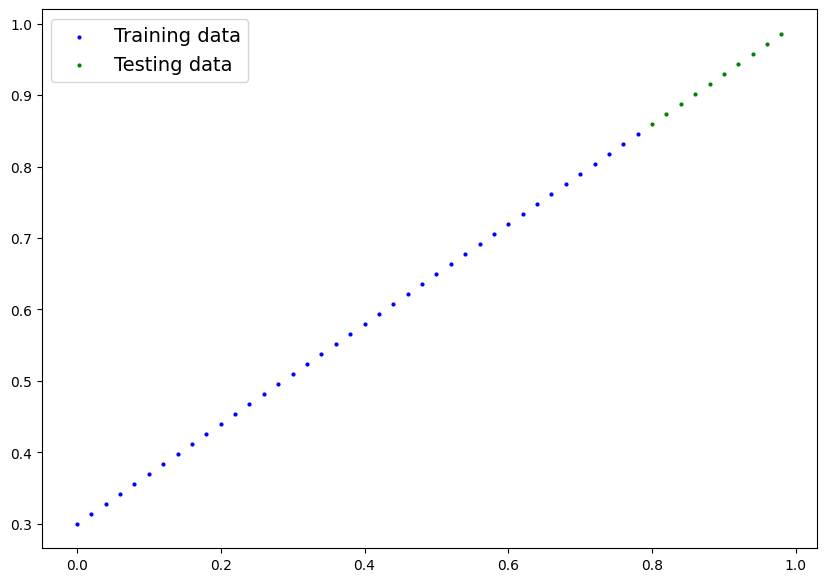

In [7]:
plot_predictions()

In [8]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

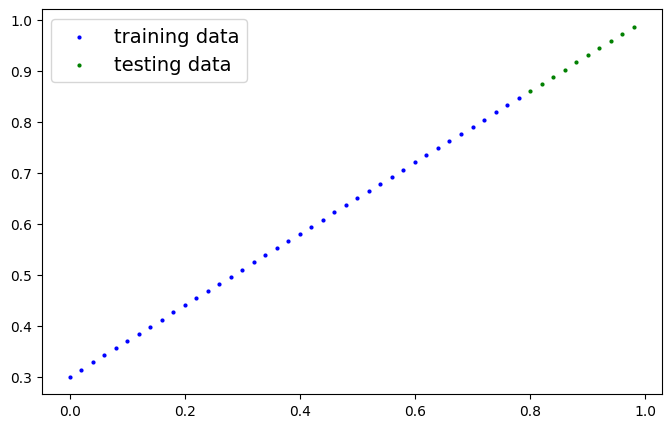

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, c="b", s=4, label="training data")
plt.scatter(X_test, y_test, c="g", s=4, label="testing data")
plt.legend(prop={"size": 14})

## 2. Build model

Our first pytorch model

Because we're going to building classes troughout the course, i'd recommend getting familiar with OOP in python, to do so you can use the following resource from Real Python : https://realpython.com/python-classes/

What the model does :
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it so?

Through this 2 main algo:
- Gradient descent - https://www.youtube.com/watch?v=IHZwWFHWa-w&pp=ygUcM2JsdWUxYnJvd24gZ3JhZGllbnQgZGVzY2VudA%3D%3D
- Backpropagation -

In [10]:
# Create a linreg model class
class LinRegModelV1(nn.Module):# <- almost everything in pytorch inherit from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                        requires_grad=True, # <- can we update this value with gradient descent?
                                        dtype=torch.float)) # <- data type of values inside the tensor
    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                        requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- Pytorch loves the datatype torch.float32

    #Forward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (also called the features)
    return self.weights * x + self.bias # this is the linreg formula

## Pytorch model building essentials
- torch.nn - containes all of the buildings for computational graphs (a neural network can be considered a computational graph)
- torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
- torch.nn.Module - The base class for all nn modules, if you subclass it, you sould overwrite forward()
- torch.optim - this where the optimizers in pytorch live, they will help with gradient descent
- def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

pytorch cheadsheet = https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contenst of or pytorch model

Now weve created a model, lets see whats inside...

So we can check our model parameters or whats inside our model using `.parameters()`

In [11]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinRegModelV1()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List named parameters

model_0.state_dict(
)

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predicton using `torch.inference_mode()`

to check our models predictive power, let see how well it predicts `y_test` based on `X_test`.

when we pass data through our model, it's going to run it through the `forward()` method.

In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
# make prediction with model

with torch.inference_mode():
  y_preds = model_0(X_test)

# we can also do seomthing similar with torch.no_grad(), however, torch.inference_mode() is preffered
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

inference mode -- https://x.com/PyTorch/status/1437838231505096708

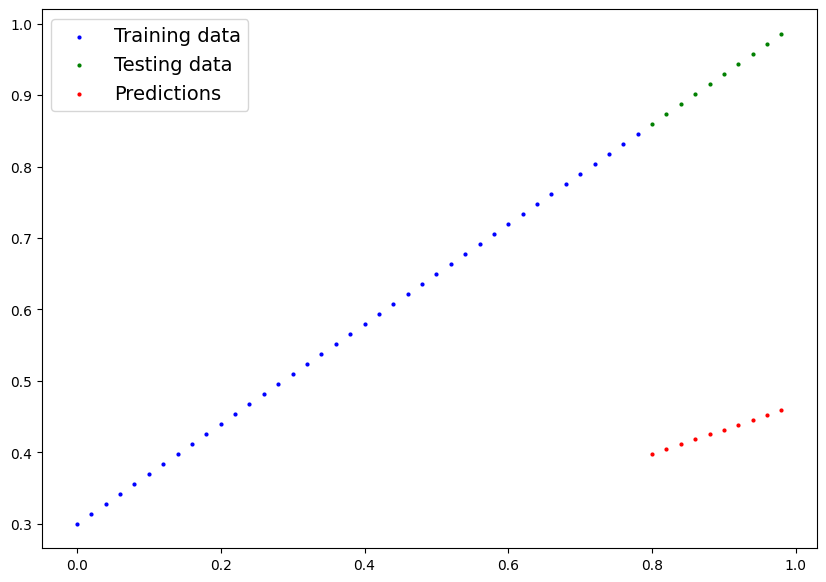

In [16]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of this training is for a model to move from some *unknown* parameters (these maybe be random) to some known parameters
    
Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss function

* note : loss function may alo be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function

Thins we need to train :

* **loss function :** A function to meassure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer :** Takes into account the loss of a model and adjusts the model's parameters (e.g weight & bias) to improve the loss function -> https://pytorch.org/docs/stable/optim.html
    * Iniside the optimizer you'll often have to set 2 parameters:
        * `params` - the model parameters you'd like to optimize, for example `model_0.parameters()`
        * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` result in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# check out the model parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# set up a loss function
loss_fn = nn.L1Loss()

# set up an opptimizer
optimizer = optim.SGD(params=model_0.parameters(),
                      lr=0.01) # learning rate = possibly the most important hyperparameter you can set

In [20]:
loss_fn

L1Loss()

**Q** : Which loss function and optimizer should i use?
**A** : This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like this), a loss function of `nn.Loss()` and an optimizer like `torch.optim.SGD()` will suffice
But for a classfication problem like classifying whether a photo is a dog or cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss) 

### Building a training loop (and testing loop) in PyTorch

A couple things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards throuh the network to calculate the gradients of each of parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust the model's parameters to try and improve the loss (**gradient descent**)

In [21]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# A epoch is a loop through the data... (this is a hyperparameter because set it ourselves)
epochs = 1

#Training
# 0. loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in PyTorch set all parameters that require gradients to require gradients
    
    # 1. Forward passs
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss 
    
    model_0.eval() # turns off gradient tracking
    